<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2020-2021/Practicas/Pr8_Kolmogorov_Smirnov_2_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 8: Test de Kolmogorov-Smirnov 2/2**

<hr>

**Nombre:**

**NIU:**

**mail (gmail):**

<hr>

**Instrucciones**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr8_NIU.ipynb", donde NIU es tu NIU (*p.e. Pr8_2055007.ipynb*, esto es un ejemplo con un NIU inventado...) 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/c6mM). Asegurate de que el fichero tiene el nombre correcto.

<hr>

### <font color='green'>**> Entrega #1**</font>

Considera una muestra de 200 medidas, que sigue una distribución Alpha (valores en la caja de código). La distribución Alpha es una distribución $f(x,a)$, contínua en $x>0$ que depende de un parámetro $a>0$. Ver documentación de la distribución en Scipy: [+info](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.alpha.html#scipy.stats.alpha)

Vamos a usar un método extendido de Komogorov-Smirnov para calcular la $a_{óptima}$, la que mejor ajusta a la distribución de probabilidad de la muestra.

Vamos a calcular ahora la $a_{óptima}$ usando la función cumulativa de tu muestra y comparando con diferentes funciones cumulativas de test. Considera 1000 pasos equidistantes entre $a_{inf}$=4 y $a_{sup}$=6. En este caso, para cada valor $x_i$ de tu muestra, la función cumulativa te incrementa en un factor 1/200, y queda fijada. 

Vamos a usar ahora una variante más completa de Kolmogorov-Smirnov: para cada punto de tu muestra puedes calcular la diferencia de la función cumulativa de tu muestra con el valor cumulativo que obtienes con la función de test en ése mismo punto, aplicando un peso y haciendo una suma cumulativa de diferencias o distancias. En la práctica anterios nos quedamos con el valor de desviación máxima. Ahora lo que haremos será, para cada punto de evaluación, multiplicaremos la distancia por el valor de la pdf en aquel punto (para que pesen más los valores más probables), y sumaremos todos los valores absolutos de distancias que evalúes para cada punto, así se promedian todas las diferencias.

La función de test que mejor se ajusta es aquella que está 'más' cerca de tu función cumulativa de muestra de acuerdo con esta distancia cumulativa pesada, que llamaremos $d_{KS}$. Para todas tus variaciones, el $a_{óptimo}$ será aquel que minimiza este valor de $d_{KS}$. 

Haz una gráfica de los valores $d_{KS}$ en el rango [$a_{inf}$,$a_{sup}$] y evalúa cual es el $a_{óptimo}$ (el que minimiza la función $d_{KS}$). El valor $d_{KS_i}$ se calcula para cada función de test $i$ como:

$$
d_{KS_i} = \sum_{n=1}^{200}( | CDF_{muestra}(x_n) - CDF_{Alpha}(x_n,a_i) | · PDF_{Alpha}(x_n,a_i) )
$$

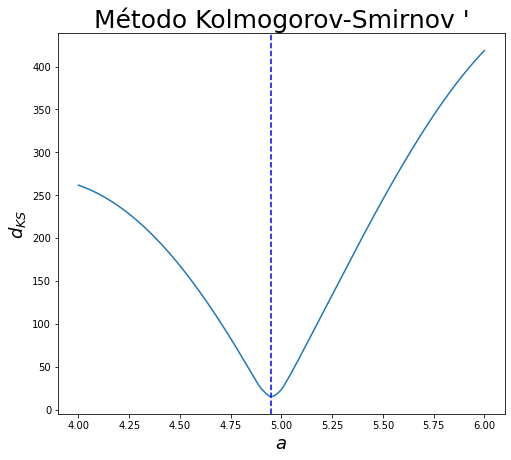


 a_óptimo KS = 4.95 



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

m = [0.20519874,0.22837031,0.19126363,0.32276018,0.17537652,0.22414797,0.16295895,0.13710499,0.15611785,0.26053577,0.1617091,0.1693346
,0.1881494,0.25213246,0.19333813,0.1438632,0.21560716,0.14473274,0.1906784,0.19147847,0.17022168,0.20903645,0.19874541,0.2060689
,0.30452823,0.18536551,0.19175189,0.284228,0.18426284,0.23209381,0.15281151,0.17296157,0.16667163,0.16383119,0.167094,0.28496032
,0.23510851,0.22014383,0.20308247,0.16509226,0.24285629,0.18841502,0.17990038,0.20373326,0.23800791,0.21232215,0.29898765,0.19633689
,0.3751609,0.19515801,0.14313831,0.24077824,0.16880671,0.1946717,0.41240505,0.17077456,0.20313652,0.15593358,0.17656886,0.17380918
,0.23422621,0.17964926,0.20855601,0.22342886,0.18123829,0.22609662,0.18549983,0.21341533,0.20916246,0.18522614,0.2284777,0.27413668
,0.24158849,0.2469647,0.22429181,0.26965301,0.1990949,0.21651633,0.24276972,0.27107404,0.1875543,0.16890195,0.22064378,0.3502591
,0.22503167,0.22124863,0.20746592,0.18960446,0.14339987,0.25464606,0.21517341,0.23104685,0.24954671,0.27128461,0.19931616,0.23524964
,0.2227242,0.21385279,0.25727182,0.33831253,0.21971686,0.17946368,0.22753979,0.21289028,0.1868034,0.19064288,0.14742604,0.33425626
,0.1665892,0.17688704,0.18074927,0.20348305,0.15494665,0.16895975,0.29391039,0.17100367,0.16900192,0.16492088,0.22795783,0.37600683
,0.20477786,0.27684437,0.25441873,0.16328106,0.15424182,0.18806244,0.35963175,0.15418358,0.22299406,0.178216,0.14724334,0.20158341,
0.28862418,0.15376382,0.16107681,0.28901667,0.18834207,0.33845578,0.2536139,0.19784695,0.15547127,0.20980525,0.23772813,0.24065593,
0.18470287,0.16989653,0.20030683,0.43751089,0.18510672,0.18858219,0.23220894,0.15514005,0.18818845,0.18912303,0.24078569,0.26985248,
0.21521374,0.27216169,0.1991286,0.18860927,0.21064165,0.17151647,0.14001019,0.26920244,0.17876738,0.26339441,0.19730412,0.20846721,
0.30087128,0.1851004,0.26066636,0.17074887,0.20364119,0.18635092,0.18820526,0.20964836,0.16280991,0.18591968,0.25085569,0.24269228,
0.3106093,0.18180602,0.23893295,0.15998086,0.15270755,0.20414556,0.23980528,0.13257892,0.15652274,0.19351444,0.17642266,0.26750404,
0.21611941,0.17155038,0.19521034,0.23287878,0.23972591,0.54245327,0.21132737,0.19285463]

mina = 4.
maxa = 6.

KS = []
#KSp = []
b = np.sort(m)

astep = np.linspace(mina,maxa,1000)
n=np.linspace(1/len(b),1,len(b))

for i in range(len(astep)):
  KS.append(np.sum(np.abs(n-ss.alpha.cdf(b,astep[i]))*ss.alpha.pdf(b,astep[i])))
#  KSp.append(np.max(np.abs(n-ss.alpha.cdf(b,astep[i]))))

plt.figure(figsize=(8, 7))
plt.plot(astep,KS)
#plt.plot(astep,KSp)
plt.title('Método Kolmogorov-Smirnov \'', fontsize=25)
plt.xlabel('$a$', fontsize=18)
plt.ylabel('$d_{KS}$', fontsize=18)
plt.axvline(astep[KS.index(np.min(KS))], linestyle='--', color='blue')
#plt.yscale('log')
plt.show()

print("\n a_óptimo KS = {:3.2f} \n".format(astep[KS.index(np.min(KS))]))
#print("\n a_óptimo KS = {:3.2f} \n".format(astep[KSp.index(np.min(KSp))]))

### <font color='green'>**> Entrega #2**</font>

Dibuja la gráfica de la función cumulativa de la muestra, y la función cumulativa de la distribución Alpha que mejor se ajusta, aquella con $a_{óptimo}$.


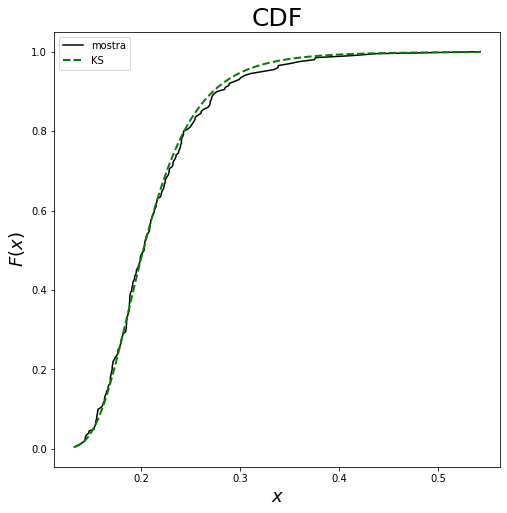

In [ ]:
x = np.linspace(np.min(b),np.max(b),1000)

plt.figure(figsize=(8, 8))
plt.plot(b,n,'-',color='k', label='mostra')
plt.plot(x,ss.alpha.cdf(x,astep[KS.index(np.min(KS))]),'g--', lw=2, label='KS')
plt.legend()
plt.title('CDF', fontsize=25)
plt.xlabel('$x$', fontsize=18)
plt.ylabel('$F(x)$', fontsize=18)
plt.show()

### <font color='green'>**> Entrega #3**</font>

Dibuja un histograma normalizado de la muestra, y la función de distribución de probabilidad Alpha que mejor se ajusta, aquella con $a_{óptimo}$.


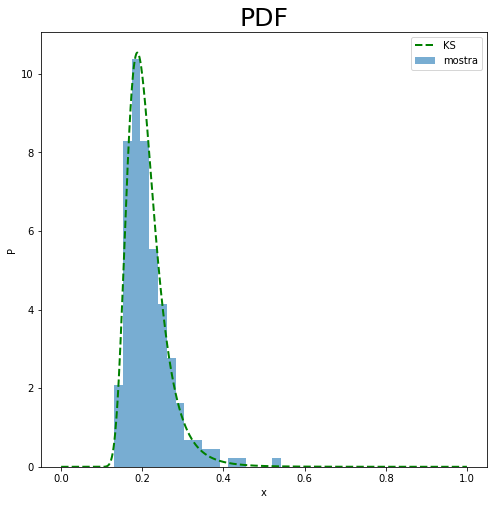

In [ ]:
x = np.linspace(0,1,1000)
y = ss.alpha.pdf(x,astep[KS.index(np.min(KS))])

plt.figure(figsize=(8, 8))
plt.hist(m, bins=25, range=[0,np.max(m)], density=True, alpha=0.6, label='mostra')
plt.plot(x,y, 'g--', lw=2, label='KS')
plt.title('PDF', fontsize=25)
plt.xlabel("x")
plt.ylabel("P")
plt.legend()
plt.show()

<hr> 

**Recuerda**

*   Rellena tu nombre, NIU i mail (gmail, si quieres recibir los comentarios/feedback acerca de tu entrega) en la cabecera de este Notebook.
*   Renombra el Notebook como "Pr8_NIU.ipynb", donde NIU es tu NIU (*p.e. Pr8_2055007.ipynb*, esto es un ejemplo con un NIU inventado). 
*   Al final de la clase donde se realize una entrega, descarga este cuaderno en formato .ipynb y lo tienes que subir al siguiente *drop folder*: [Link](http://cern.ch/go/c6mM). Asegurate de que el fichero tiene el nombre correcto.
*   Solo se evaluará la parte de la entrega. Tendréis acceso a la solución de todas las partes y después de haber entregado la práctica.

<hr>